In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pickle

In [2]:
data = pd.read_csv('F:/Crop Prediction/data/dataset/Crop_recommendation.csv')
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [4]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [5]:
data['label'].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

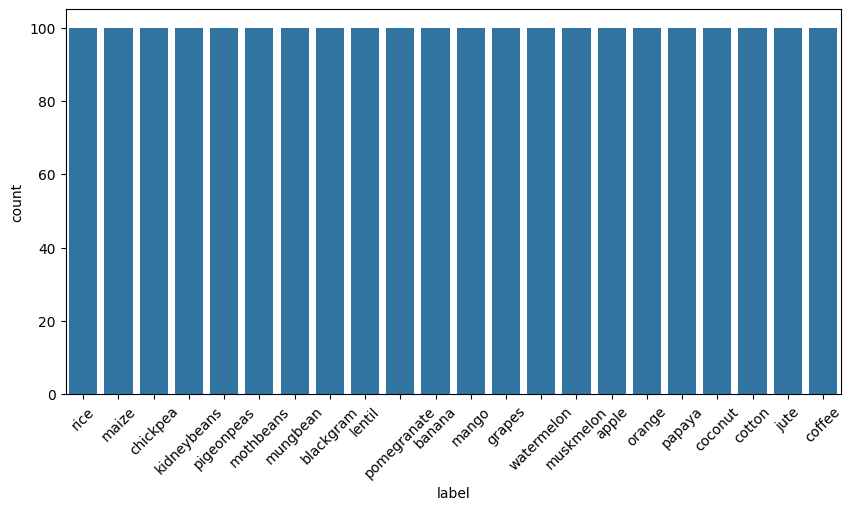

In [6]:
plt.figure(figsize=(10, 5))
sns.countplot(x='label', data=data, order=data['label'].value_counts().index)
plt.xticks(rotation=45)
plt.show()

In [7]:
X = data.drop(columns='label')
y = data['label']


In [8]:
X.shape

(2200, 7)

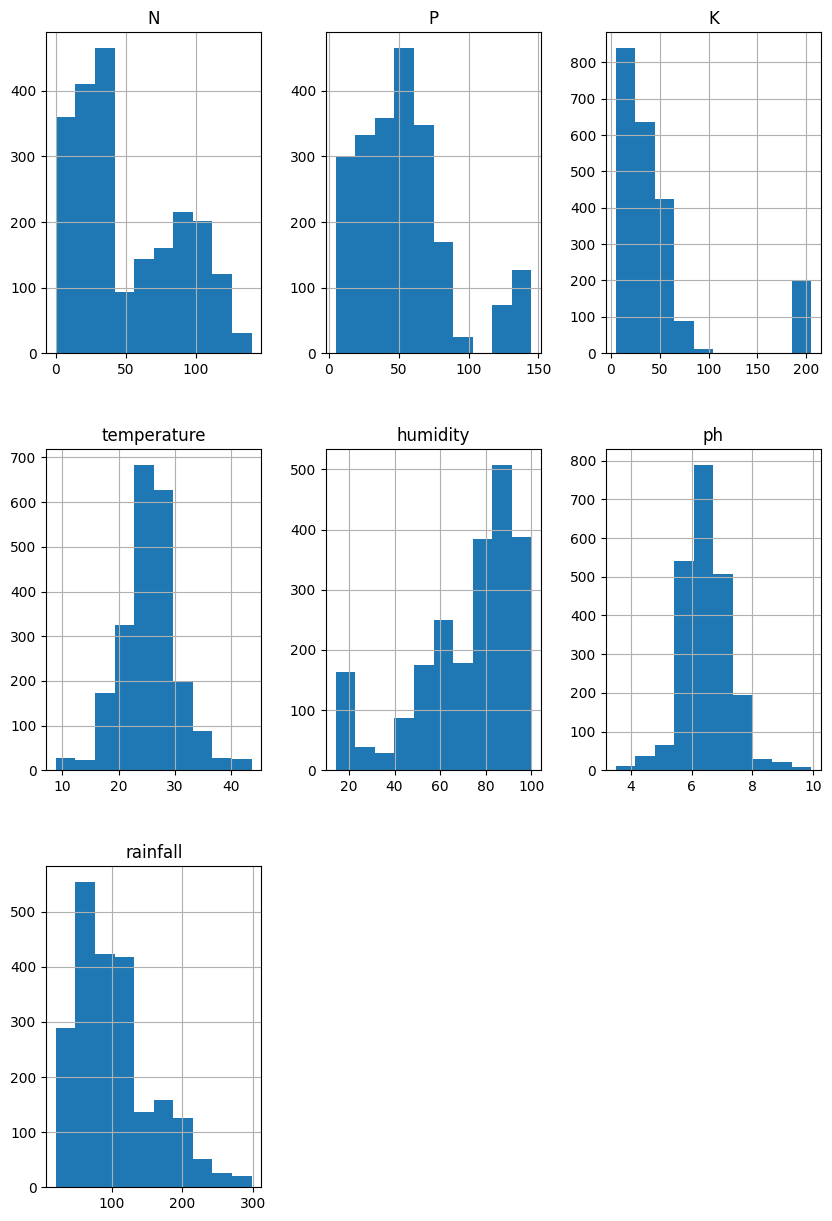

In [9]:
X.hist(figsize=(10, 15))
plt.show()

In [10]:
scalar = StandardScaler()


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [12]:
X_train.shape, X_test.shape

((1760, 7), (440, 7))

In [13]:
X_train_scalar = scalar.fit_transform(X_train)

In [14]:
X_test_scalar = scalar.transform(X_test)

In [15]:
with open('F:/Crop Prediction/src/models/scalar.pkl', 'wb') as f:
    pickle.dump(scalar, f)

In [16]:
X_train_scalar  

array([[-1.23535484, -1.37948493, -0.85204721, ...,  0.93228876,
         0.11184124,  0.1639292 ],
       [-0.60999952, -0.80091479, -0.31904802, ...,  0.96703665,
        -0.91429337,  1.60683556],
       [ 1.72828561, -1.37948493,  0.03628477, ...,  0.75638126,
         0.1362646 , -0.83720735],
       ...,
       [-0.6915676 ,  0.11261702, -0.47697371, ..., -0.57732492,
         0.64213169, -1.22104821],
       [ 0.6679005 , -0.46595313, -0.18086305, ...,  0.59857743,
        -0.33499562,  3.29011737],
       [-0.3381059 ,  0.44757868,  0.11524762, ...,  0.86902366,
         0.33890196,  1.79468503]])

In [17]:
label_encoder = LabelEncoder()

In [18]:
y_train.head()

1673        orange
1896       coconut
1303    watermelon
1392    watermelon
1591         apple
Name: label, dtype: object

In [19]:
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encodeed = label_encoder.transform(y_test)

In [20]:
with open('F:/Crop Prediction/src/models/label_encoder.pkl','wb') as f:
    pickle.dump(label_encoder, f)

In [21]:
y_train_encoded

array([16,  4, 21, ..., 13, 20, 17])

In [22]:
label_encoder.classes_

array(['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
       'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
       'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
       'pigeonpeas', 'pomegranate', 'rice', 'watermelon'], dtype=object)

In [23]:
log_reg = LogisticRegression()

In [24]:
log_reg.fit(X_train_scalar, y_train_encoded)

LogisticRegression()

In [25]:
y_train_pred_log_reg = log_reg.predict(X_train_scalar)

In [26]:
y_train_accuracy = accuracy_score(y_train_pred_log_reg, y_train_encoded)
y_train_accuracy

0.9744318181818182

In [27]:
y_test_pred_log_reg = log_reg.predict(X_test_scalar)
y_test_accuracy = accuracy_score(y_test_pred_log_reg, y_test_encodeed)
y_test_accuracy

0.975

In [28]:
random_forest = RandomForestClassifier()

In [29]:
random_forest.fit(X_train_scalar, y_train_encoded)

RandomForestClassifier()

In [30]:
y_train_pred_rnd = random_forest.predict(X_train_scalar)
accuracy_score(y_train_pred_rnd, y_train_encoded)

1.0

In [31]:
y_test_pred_rnd = random_forest.predict(X_test_scalar)
accuracy_score(y_test_pred_rnd, y_test_encodeed)

0.990909090909091

In [32]:
with open('F:/Crop Prediction/src/models/random_forest.pkl', 'wb') as f:
    pickle.dump(random_forest, f)